# Pyoso Quickstart

Full getting started with pyoso guide is available here: https://docs.opensource.observer/docs/get-started/python/

In [1]:
#! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

In [3]:
# Helper function for inserting arrays into queries
def stringify(arr):
    return "'" + "','".join(arr) + "'"

# Run some initial queries just to explore the models available

In [4]:
# Get all models currently available on OSO
client.to_pandas("SELECT * FROM models_v0 LIMIT 5")

,model_id,model_name,rendered_sql,rendered_at
0,Zw48kKUchaKLlSr0KjRajOVmSS0Wr3uG49i2g6ok3kA=,comments_to_collection_monthly,"SELECT CAST(DATE_PARSE('1970-01-01', '%Y-%m-...",2025-04-01 00:10:20.820
1,jLuZLUhFXdGYrHsF4ME7RzEdKPMuC9l0kflOem1GJag=,comments_to_collection_over_all_time,"SELECT CAST(DATE_PARSE('1970-01-01', '%Y-%m-...",2025-04-01 00:10:53.700
2,qFe8XjfH4PtcHagwy8eqByDUn85jXeI7XlZAo1QuxJM=,comments_to_collection_weekly,"SELECT CAST(DATE_PARSE('1970-01-01', '%Y-%m-...",2025-04-01 00:09:07.828
3,Fl3ClAyf9fPjiJVnfWyzGfbdQI0ZVCd+YuiLPC2Z5o4=,commits_to_collection_daily,"SELECT CAST(DATE_PARSE('1970-01-01', '%Y-%m-...",2025-04-01 00:09:38.392
4,cZjmmYnh4HM6nlj3OZdd7mR2evpBRPswS/xRraP0tAY=,commits_to_collection_monthly,"SELECT CAST(DATE_PARSE('1970-01-01', '%Y-%m-...",2025-04-01 00:10:16.741


In [5]:
# Get the list of v1 (stable) production models
client.to_pandas("SELECT * FROM models_v0 WHERE model_name LIKE '%_v1'")

,model_id,model_name,rendered_sql,rendered_at
0,BrMoDljk10fYeGJO+2vAZhxdZ4c9+ofkb3f52rBeoZo=,event_types_v1,"WITH ""all_event_types"" AS ( SELECT ""int_...",2025-04-01 00:08:51.330
1,vrv4YGCvh4se48QJiVctVgDaGhC+J9jAnaJmUPI9AuA=,collections_v1,"SELECT ""collections"".""collection_id"" AS ""col...",2025-04-01 00:08:50.759
2,/Pgs0Pew5D9hUb+PKtkyXWRb57vCu4H3DZMJQYzcxDo=,artifacts_v1,"SELECT ""int_artifacts"".""artifact_id"" AS ""art...",2025-04-01 00:08:49.632
3,HwiIdYd+DyWBfLGkM2y+8j7vZrMw9Ik0zzTQQHYh/4g=,artifacts_by_collection_v1,"SELECT ""int_artifacts_by_collection"".""artifa...",2025-04-01 00:08:48.762
4,O0RnB9Fs+aOrKFnhvZ6TaI1YS8EiJf3jRNcJw2KdxZY=,artifacts_by_project_v1,"SELECT ""int_artifacts_by_project"".""artifact_...",2025-04-01 00:08:49.911
5,cUe+fAo19qp+FCWtmTEIMjjyXKck+8w+mc6CqbrjZsQ=,projects_v1,"SELECT ""projects"".""project_id"" AS ""project_i...",2025-04-01 00:08:50.206
6,laADUO2JV1w7TAV3IQHXK/01Vgir5FdBmSjqXy1jNew=,projects_by_collection_v1,"SELECT ""projects_by_collection"".""project_id""...",2025-04-01 00:08:49.354


In [6]:
# Get the list of v0 (less stable) production models
client.to_pandas("SELECT * FROM models_v0 WHERE model_name LIKE '%_v0'")

,model_id,model_name,rendered_sql,rendered_at
0,iCIIbZt/5rFkvFBb6ddgZEpOxg8ZKAjTgpJVuKptsIU=,contracts_v0,"SELECT CAST(DATE_TRUNC('DAY', ""int_contracts...",2025-04-01 00:08:50.480
1,XIANu9uAuvHsb70FOWyUPeiRb2lHqUm4wtrsb6fKoPw=,package_owners_v0,"SELECT DISTINCT ""int_sbom_artifacts"".""packag...",2025-04-01 00:08:49.051
2,PjBFaVMj8VuaIVo6YhuoN8R4NOOOned067UvHxFWOIo=,sboms_v0,"SELECT DISTINCT ""int_sbom_artifacts"".""projec...",2025-04-01 00:08:51.040
3,j++/Nb5HJcjMwW2AXVjRJry2Tldg59p199UqHHTXuV4=,timeseries_metrics_by_artifact_v0,"WITH ""all_key_metrics_by_artifact"" AS ( SELE...",2025-04-01 00:08:48.112
4,E43QKNjOJMJb8SgW9GXT7BnnzVotJuDN4A8bbrVSqhU=,timeseries_metrics_by_collection_v0,"WITH ""all_key_metrics_by_collection"" AS ( SE...",2025-04-01 00:08:47.138
5,Y9FZAHn+jE/tsXyT8u7y6JGlI69rTziq/s2QmBYhTVU=,timeseries_metrics_by_project_v0,"WITH ""all_key_metrics_by_project"" AS ( SELEC...",2025-04-01 00:08:46.815
6,HcyIHvfuUK4U5OPz/Hrj1lUCSFiLNtCFuJbU9M5npy4=,models_v0,"WITH ""all_timeseries_metrics_by_project"" AS ( ...",2025-04-01 00:08:52.372
7,IuQzTFMd110cMq6Iu7HsnQJBk8iMVRBgT6+LUgHtMsM=,key_metrics_by_artifact_v0,"WITH ""key_metrics_by_artifact_v0_no_casting"" A...",2025-04-01 00:08:47.793
8,I+AOCpwQiEnj6MuoN6aCFjTP+4VwKgbiPMQbkulHY5Y=,key_metrics_by_collection_v0,"WITH ""key_metrics_by_collection_v0_no_casting""...",2025-04-01 00:08:46.204
9,S4WOODykLnm2K50r7scrusXdV47UBfFezfOkOzVXvGs=,key_metrics_by_project_v0,"WITH ""key_metrics_by_project_v0_no_casting"" AS...",2025-04-01 00:08:46.501


# Perform some queries on popular models

In [7]:
# Get a list of projects
client.to_pandas("SELECT * FROM projects_v1 LIMIT 5")

,project_id,project_source,project_namespace,project_name,display_name,description
0,9IEEBEDRzDEF7PSu59Pff6ZOhdBtP/8vQPZkRjft9+o=,OSS_DIRECTORY,oso,peternator7,Peter Glotfelty,None
1,FozKDbR9ETur69otAweoi9kIGKCejARzPhElzEjzKIo=,OSS_DIRECTORY,oso,pristorage-manhnvan,Pristorage,None
2,ETTIwZYupJJehgNu2CkKgbcBGFZ8/RWQmciTA52WRVU=,OSS_DIRECTORY,oso,plantoids,plantoids,None
3,ceJl36Oz36IUC81YqNHxAeTh29lGtA0HMsyl+kpHSJk=,OSS_DIRECTORY,oso,princeton-blockchain-club,Princeton-Blockchain-Club,None
4,LNiZlYbnClURltqN0bCewAuqXaYdB+pZ4VWUpy3UZRI=,OSS_DIRECTORY,oso,protolambda,protolambda,None


In [8]:
# Lookup a specific project
client.to_pandas("SELECT * FROM projects_v1 WHERE project_name = 'opensource-observer'")

,project_id,project_source,project_namespace,project_name,display_name,description
0,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer,Open Source Observer,Open Source Observer is a free analytics suite...


In [9]:
# Get all artifacts owned by a project
df_abp = client.to_pandas("SELECT * FROM artifacts_by_project_v1 WHERE project_name = 'opensource-observer'")
df_abp

,artifact_id,artifact_source_id,artifact_source,artifact_namespace,artifact_name,project_id,project_source,project_namespace,project_name
0,MJebS0B8hfqvMuF1Xp43dlR4WB5TzCyCaZ8YArOlgsk=,851248585,GITHUB,opensource-observer,sqlglot,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
1,tKRIuyyc4i0/9guvlfd6uUwX9DQNCv4ol0Wtu9EGj/M=,700906634,GITHUB,opensource-observer,insights,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
2,BveKFTOec1N8fHTPwhfKacYMJyfW9PYwqicfOnNriDw=,829525979,GITHUB,opensource-observer,private-ops,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
3,HO3Xu1wCW8uOiPnGk+V8q6mEdNXL8/8YHlyWUZQiJwA=,869660673,GITHUB,opensource-observer,awesome-oso,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
4,XGpq2zZsHiZbRLrEYibeOVMdBnNoWBTZalaRn9egwhI=,670784638,GITHUB,opensource-observer,oso,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
5,+kHbCsQ9F0FYxQgc8CM6oFljY1du1Ih4j8dMN4WuRsc=,847960284,GITHUB,opensource-observer,dagster-sqlmesh,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
6,wAFCEJNQ4YPrs2Ev+DYUMM2/1DMT0Q1Zxa7aR1nWd1M=,875108565,GITHUB,opensource-observer,ethglobal-sf-2024,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
7,qYYB+4a+C+oGOB7l95yynPNtz8i6qaZGo5UdSObuhJc=,702906083,GITHUB,opensource-observer,test-public-repo,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
8,n+w2E3FSHG9x1TW0toVZwe/oPUBV/2JMhGlZy01yCG8=,853557673,GITHUB,opensource-observer,kariba,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
9,RFQVW7NouLnUiz9/9Fw7eAEv+vMSjBBtZrysbU/5vqk=,767826012,GITHUB,opensource-observer,oss-funding,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer


In [10]:
# Get available key metrics for OSO
client.to_pandas("""
  SELECT
    km.metric_id,
    m.metric_name,
    m.display_name,
    km.sample_date,
    km.amount,
    km.unit 
  FROM key_metrics_by_project_v0 AS km
  JOIN metrics_v0 AS m ON m.metric_id = km.metric_id
  WHERE km.project_id = 'UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk='
""")

,metric_id,metric_name,display_name,sample_date,amount,unit
0,4qXMv/x67zMwqoF6hmivpo74Y++R2lhT4Y9CjZKpt00=,GITHUB_opened_pull_requests_over_all_time,Opened Pull Requests,2025-04-02,2171.0,None
1,1zNSDLeL7d1bqMgJ4b/AGBd0lQs4Q4Wy9jIf2ge72kw=,GITHUB_commits_over_all_time,Commits,2025-04-02,2943.0,None
2,5ZLGEJ/RoW00SLRJWIC0GFhRaud5h29Lshc2erSNHHQ=,GITHUB_avg_prs_time_to_merge_over_all_time,Average PR Time to Merge,2025-04-02,0.0,None
3,fCurNzGHifHJShhc0wVn6SMz9ja/NBg7nXzIE8A9PIA=,OPTIMISM_transactions_over_all_time,Transactions,2025-04-02,37.0,None
4,d5VBo6xBRMwXq6CEm4KgX+NrdrU45HR1ryhhO9szl60=,GITHUB_comments_over_all_time,Comments,2025-04-02,6002.0,None
5,yENOci1vNPlXyu75FDtgH6XUKIKZh1XfTSe+AEdwLTE=,GITHUB_repositories_over_all_time,Repositories,2025-04-02,12.0,None
6,ftrYmCWeazkMzCpce018wYydj/HovL+5q25MGl+4uv0=,GITHUB_opened_issues_over_all_time,Opened Issues,2025-04-02,1578.0,None
7,zqqzFEQxHTmLdyh9m6KMUUAdZL01Wt+C4SYmo1VPOn0=,GITHUB_active_developers_over_all_time,Active Developers,2025-04-02,102.0,None
8,/3v26jfsOswJmGRIAQiiwVjYPqYTwQDlD2dQMR0h3yw=,OPTIMISM_active_contracts_over_all_time,Active Contracts,2025-04-02,1.0,None
9,gKlMLwqOAY0NndkTeXiaN4XM8RqhEu9RGvYhZRLPPMM=,GITHUB_merged_pull_requests_over_all_time,Merged Pull Requests,2025-04-02,2027.0,None


In [11]:
# Get a set of key metrics for a few projects using the stringify helper

MY_PROJECTS = ['opensource-observer', 'huggingface', 'wevm']
MY_METRICS = ['GITHUB_stars_over_all_time', 'GITHUB_forks_over_all_time']

client.to_pandas(f"""
  SELECT
    --p.project_id,
    --p.project_name,
    p.display_name AS project_display_name,
    --km.metric_id,
    --m.metric_name,
    m.display_name AS metric_display_name,
    km.sample_date,
    km.amount
    --km.unit 
  FROM key_metrics_by_project_v0 AS km
  JOIN metrics_v0 AS m ON m.metric_id = km.metric_id
  JOIN projects_v1 AS p ON p.project_id = km.project_id
  WHERE
    p.project_name IN ({stringify(MY_PROJECTS)})
    AND m.metric_name IN ({stringify(MY_METRICS)})
  ORDER BY p.display_name, m.display_name
""")

,project_display_name,metric_display_name,sample_date,amount
0,Hugging Face,Forks,2025-04-02,75103
1,Hugging Face,Stars,2025-04-02,454052
2,Open Source Observer,Forks,2025-04-02,220
3,Open Source Observer,Stars,2025-04-02,213
4,wevm,Forks,2025-04-02,1715
5,wevm,Stars,2025-04-02,5234


In [12]:
# Get timeseries metrics for OSO
df_stars = client.to_pandas("""
  SELECT
    tm.metric_id,
    m.metric_name,
    m.display_name,
    tm.sample_date,
    tm.amount,
    tm.unit 
  FROM timeseries_metrics_by_project_v0 AS tm
  JOIN metrics_v0 AS m ON m.metric_id = tm.metric_id
  JOIN projects_v1 AS p ON p.project_id = tm.project_id
  WHERE
    p.project_name = 'opensource-observer'
    AND m.metric_name = 'GITHUB_stars_daily'
  ORDER BY tm.sample_date
""")
df_stars

,metric_id,metric_name,display_name,sample_date,amount,unit
0,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-05,1,None
1,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-13,1,None
2,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-16,1,None
3,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-02,1,None
4,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-06,1,None
...,...,...,...,...,...,...
149,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-20,1,None
150,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-24,1,None
151,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-26,3,None
152,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-28,1,None


In [13]:
df_stars['cumulative_amount'] = df_stars['amount'].cumsum()
df_stars

,metric_id,metric_name,display_name,sample_date,amount,unit,cumulative_amount
0,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-05,1,None,1
1,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-13,1,None,2
2,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-16,1,None,3
3,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-02,1,None,4
4,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-06,1,None,5
...,...,...,...,...,...,...,...
149,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-20,1,None,207
150,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-24,1,None,208
151,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-26,3,None,211
152,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-03-28,1,None,212


<Axes: xlabel='sample_date'>

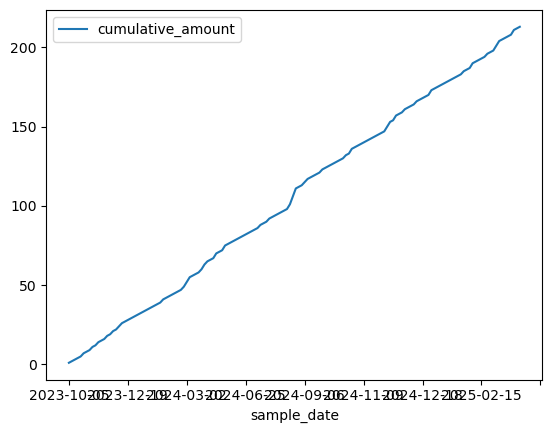

In [14]:
df_stars.plot(x='sample_date', y='cumulative_amount')